In [1]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.cm as cm

In [2]:
from sentence_transformers import SentenceTransformer, util

In [3]:
def get_data(year: int) -> pd.DataFrame:
    return pd.read_csv(f"years/{year}.csv")

def filter(df: pd.DataFrame, level: str, vals: list[str]) -> pd.DataFrame:
    return df[df[level].isin(vals)]

def limiter(df: pd.DataFrame, level: str, percent: float) -> pd.DataFrame:
    return train_test_split(df, train_size=percent, stratify=df[level], shuffle=True)[0]

In [4]:
p2000 = get_data(2000)
p2010 = get_data(2010)

In [12]:
p2010

,Text,Section,Class,Subclass,Group
0,Object value multiplication method for compute...,G,G06,G06F,G06F-007
1,Object value multiplication method for compute...,G,G06,G06F,G06F-009
2,Object value multiplication method for compute...,G,G06,G06F,G06F-007
3,Object value multiplication method for compute...,G,G06,G06F,G06F-017
4,Incremental search performing system for conta...,G,G06,G06F,G06F-000
...,...,...,...,...,...
135557,"Method of processing electronic transaction, i...",G,G06,G06F,G06F-021
135558,Non-transitory computer-readable medium for co...,G,G06,G06F,G06F-017
135559,Method for creating version-to-version positio...,G,G06,G06F,G06F-017
135560,Method for creating version-to-version positio...,G,G06,G06F,G06F-017


In [17]:
1 + len(p2000["Section"].unique()) + len(p2000["Class"].unique()) + len(p2000["Subclass"].unique())

624

In [29]:
level = "Subclass"
subclasses = ['G05B', 'H01L', 'G06K']
percent = 0.2
p2000, p2010 = filter(p2000, level, subclasses), filter(p2010, level, subclasses)
p2000, p2010 = limiter(p2000, level, percent), limiter(p2010, level, percent)


In [30]:
p2000_x, p2000_y = p2000["Text"], p2000["Subclass"]
p2010_x, p2010_y = p2010["Text"], p2010["Subclass"]

In [31]:
p2000_x_train, p2000_x_test, p2000_y_train, p2000_y_test = train_test_split(p2000_x, p2000_y, shuffle=True, stratify=p2000_y, random_state=40132)

In [32]:
vectorizer = SentenceTransformer('allenai-specter')

e:\_PROGRAMS\Python311\Lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [33]:
p2000_x_train_v = vectorizer.encode(p2000_x_train.to_list())

In [34]:
p2000_x_test_v = vectorizer.encode(p2000_x_test.to_list())

In [ ]:
import pickle

with open("p2000_x_train_v.pkl", "wb") as f:
    pickle.dump(p2000_x_train_v, f)

with open("p2000_x_test_v.pkl", "wb") as f:
    pickle.dump(p2000_x_test_v, f)

In [ ]:
with open("p2000_x_train_v.pkl", "rb") as f:
    p2000_x_train_v = pickle.load(f)

with open("p2000_x_test_v.pkl", "rb") as f:
    p2000_x_test_v = pickle.load(f)

In [35]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from umap import UMAP

pca = PCA(n_components=2, random_state=412)
tsne = TSNE(n_components=2, random_state=42)
umap = UMAP(n_components=2, n_neighbors=15, min_dist=0.1, metric='cosine')

# plt_result_train = pca.fit_transform(pipeline.named_steps['tfidf'].transform(train_df['Text']).toarray())
# plt_result_test = pca.transform(pipeline.named_steps['tfidf'].transform(test_df['Text']).toarray())

# plt_result_train = tsne.fit_transform(pipeline.named_steps['tfidf'].transform(train_df['Text']).toarray())
# plt_result_test = tsne.fit_transform(pipeline.named_steps['tfidf'].transform(test_df['Text']).toarray())

plt_result_train = umap.fit_transform(p2000_x_train_v)
plt_result_test = umap.transform(p2000_x_test_v)

In [36]:
disp_limit = 100000
subset_train_indices = []
subset_test_indices = []

for class_label in p2000_y_train.unique():
    class_indices_train = np.where(p2000_y_train == class_label)[0][:disp_limit]
    class_indices_test = np.where(p2000_y_test == class_label)[0][:disp_limit]
    
    subset_train_indices.extend(class_indices_train)
    subset_test_indices.extend(class_indices_test)

In [37]:
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(p2000_y_train)
test_labels_encoded = label_encoder.transform(p2000_y_test)
for class_label in p2000_y_train.unique():
    class_indices_train = np.where(p2000_y_train == class_label)[0][:disp_limit]
    subset_train_indices.extend(class_indices_train)
    class_indices_test = np.where(p2000_y_test == class_label)[0][:disp_limit]
    subset_test_indices.extend(class_indices_test)

In [38]:
classes = p2000_y_train.unique()
colors = cm.rainbow(np.linspace(0, 1, len(classes)))

C:\Users\SilkSlime\AppData\Local\Temp\ipykernel_14832\2353808188.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(plt_result_train[subset_train_indices, 0][indices], plt_result_train[subset_train_indices, 1][indices], c=color, label=label, marker='o', alpha=0.1, linewidths=0, s=10)


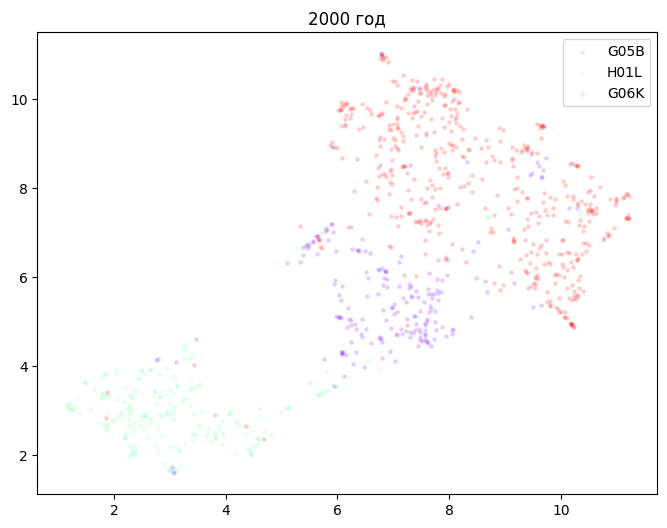

C:\Users\SilkSlime\AppData\Local\Temp\ipykernel_14832\2353808188.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(plt_result_test[subset_test_indices, 0][indices], plt_result_test[subset_test_indices, 1][indices], c=color, label=label, marker='o', alpha=0.3, linewidths=0, s=10)


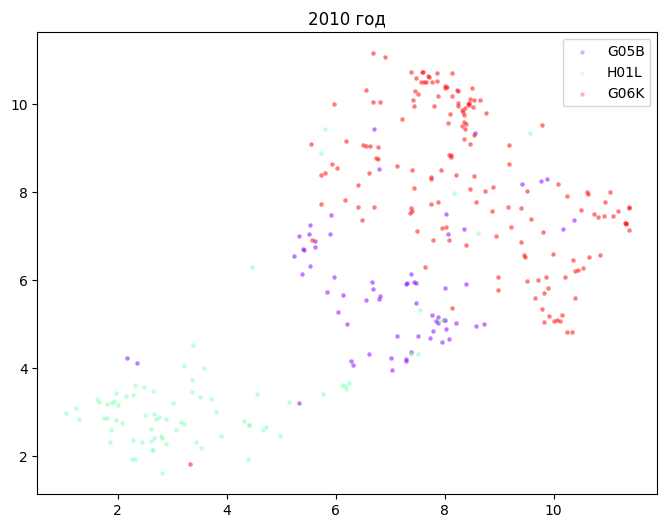

In [39]:
labels = label_encoder.inverse_transform(train_labels_encoded[subset_train_indices])
plt.figure(figsize=(8, 6))
for label, color in zip(classes, colors):
    indices = np.where(labels == label)
    plt.scatter(plt_result_train[subset_train_indices, 0][indices], plt_result_train[subset_train_indices, 1][indices], c=color, label=label, marker='o', alpha=0.1, linewidths=0, s=10)
plt.title('2000 год')
plt.legend()
plt.show()
labels = label_encoder.inverse_transform(test_labels_encoded[subset_test_indices])
plt.figure(figsize=(8, 6))
for label, color in zip(classes, colors):
    indices = np.where(labels == label)
    plt.scatter(plt_result_test[subset_test_indices, 0][indices], plt_result_test[subset_test_indices, 1][indices], c=color, label=label, marker='o', alpha=0.3, linewidths=0, s=10)
plt.title('2010 год')
plt.legend()
plt.show()